In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import csv
import requests

In [5]:
from tqdm import tqdm

In [9]:
URL = "https://www.federalregister.gov/developers/api/v1"

r = requests.get(URL)
print(r, r.status_code, r.ok)

print(r.content[:100])

<Response [200]> 200 True
b'<!DOCTYPE html><html><head><base href="/developers/api/"><title>Federal Register API API Documentati'


In [10]:
sample_url = "https://www.federalregister.gov/api/v1/documents/2018-21106.json?fields%5B%5D=agencies"

r = requests.get(sample_url)
print(r, r.status_code, r.ok)

print(r.json())
print()
print(r.json()['agencies'][0]['raw_name'])

<Response [200]> 200 True
{'agencies': [{'raw_name': 'DEPARTMENT OF HOMELAND SECURITY', 'name': 'Homeland Security Department', 'id': 227, 'url': 'https://www.federalregister.gov/agencies/homeland-security-department', 'json_url': 'https://www.federalregister.gov/api/v1/agencies/227.json', 'parent_id': None, 'slug': 'homeland-security-department'}]}

DEPARTMENT OF HOMELAND SECURITY


document_id = '2018-21106'
return_format = 'json'

url = f"https://www.federalregister.gov/api/v1/documents/{document_id}.{return_format}"
payload = {'fields[]':['agencies','docket_id']}
print(url, params)

r = requests.get(url, params=payload)
print(r.request.body)
print(r, r.status_code, r.ok)

print(r.json())
print()
print(r.json().keys())


#url = 'https://www.federalregister.gov/api/v1/documents.json?per_page=20&order=newest'

url = 'https://www.federalregister.gov/api/v1/documents.json'
payload = {
    'per_page':20,
    'order':'newest',
    'conditions[term]': 'machine learning',
    'fields[]': 'significant',
    'page':15,
}
print(url, payload)

r = requests.get(url,params=payload)
print(r, r.status_code, r.ok)

if not r.ok:
    print(r.content)


#print(r.json())
print()
print(r.json().keys())
print(len(r.json()['results']))

res = r.json()['results']
print([x['title'] for x in res])

In [ ]:
url = 'https://www.federalregister.gov/api/v1/documents.json'

term = 'data mining'
per_page = 1000

# Define the payload fields
payload = {'conditions[term]': term, 'per_page': per_page,}
r = requests.get(url,params=payload)

# Count the number of documents
n_documents = r.json()['count']
n_pages = r.json()['total_pages']

data = []

for n in tqdm(range(n_pages)):
    payload = {
        'per_page':per_page,
        'order':'newest',
        'conditions[term]': term,
        'fields[]': ['action', 'subtype', 'significant', 'document_number', 'publication_date', 'abstract', 'agency_names', 'agencies', 'title', 'topics', 'type', 'effective_on'],
        'page':n+1,
    }
        
    r = requests.get(url,params=payload)
    
    res = r.json()['results']
    data.extend(res)
    
    #print(res[0])    
    #print([x['title'][:50] for x in res[:5]])

  0%|          | 0/10 [00:00<?, ?it/s]

In [59]:
df = pd.DataFrame(data).set_index('document_number')
df.to_csv('fed_reg.csv')
print(len(df))
df

500


,abstract,action,agencies,agency_names,effective_on,publication_date,significant,subtype,title,topics,type
document_number,,,,,,,,,,,
2019-24483,None,None,"[{'raw_name': 'DEPARTMENT OF JUSTICE', 'name':...","[Justice Department, Antitrust Division]",None,2019-11-12,None,None,Notice Pursuant to the National Cooperative Re...,[],Notice
2019-24138,This final rule with comment period revises th...,Final rule with comment period.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"[Health and Human Services Department, Centers...",2020-01-01,2019-11-12,False,None,Medicare Program: Changes to Hospital Outpatie...,"[Administrative practice and procedure, Biolog...",Rule
2019-24063,This final rule updates and makes revisions to...,Final rule.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"[Health and Human Services Department, Centers...",2020-01-01,2019-11-08,False,None,Medicare Program; End-Stage Renal Disease Pros...,"[Administrative practice and procedure, Drugs,...",Rule
2019-20788,The Employment and Training Administration (ET...,Proposed rule.,"[{'raw_name': 'DEPARTMENT OF LABOR', 'name': '...","[Labor Department, Employment and Training Adm...",2019-12-09,2019-11-07,True,None,Trade Adjustment Assistance for Workers,"[Administrative practice and procedure, Employ...",Proposed Rule
2019-21260,The Securities and Exchange Commission (the ``...,Proposed rule and concept release.,[{'raw_name': 'SECURITIES AND EXCHANGE COMMISS...,[Securities and Exchange Commission],None,2019-10-30,False,None,Publication or Submission of Quotations Withou...,"[Administrative practice and procedure, Report...",Proposed Rule
2019-22684,The Department of Health and Human Services (`...,Issuance of guidelines.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,[Health and Human Services Department],2020-01-01,2019-10-25,True,None,Mandatory Guidelines for Federal Workplace Dru...,[],Rule
2019-22027,This proposed rule is being issued by the Offi...,Proposed rule.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,[Health and Human Services Department],None,2019-10-17,False,None,Medicare and State Healthcare Programs: Fraud ...,"[Administrative practice and procedure, Fraud,...",Proposed Rule
2019-22325,This final rule amends the REAL ID regulation ...,Final rule.,[{'raw_name': 'DEPARTMENT OF HOMELAND SECURITY...,[Homeland Security Department],2019-10-15,2019-10-15,False,None,Minimum Standards for Driver's Licenses and Id...,[],Rule
2019-21852,The National Institute of Standards and Techno...,Notice.,"[{'raw_name': 'DEPARTMENT OF COMMERCE', 'name'...","[Commerce Department, National Institute of St...",None,2019-10-08,None,None,National Cybersecurity Center of Excellence (N...,[],Notice


In [60]:
print(f"Fraction with abstracts", 1 - df.abstract.isnull().mean())
ab = df.abstract.copy().dropna()
ab.str.len()

Fraction with abstracts 0.914


document_number
2019-24138    1277
2019-24063    1363
2019-20788     837
2019-21260    1244
2019-22684     251
2019-22027    1460
2019-22325     569
2019-21852     541
2019-21769     576
2019-20826     408
2019-21520     436
2019-20459    1207
2019-20736    1050
2019-20732    1086
2019-20686    1094
2019-19309    1329
2019-20201     281
2019-19763     218
2019-19811     254
2019-19715     991
2019-18941     529
2019-18766     995
2019-17410     744
2019-17910    1469
2019-17481     919
2019-16107    1528
2019-16583     594
2019-16369    1402
2019-15727     933
2019-16074    1724
              ... 
2014-01613     934
2014-01163     722
2014-00404     726
2013-29863     817
2013-29627    1506
2013-30724    1333
2013-30924     783
2013-30923     700
2013-30465    2457
2013-28032     658
2013-29677     526
2013-29349    1132
2013-28696     527
2013-28737    1143
2013-28775    1443
2013-29084     515
2013-28776     980
2013-28451     850
2013-23895     351
2013-28168    1239
2013-27453     

In [61]:
ab.str.len().describe()

count     457.000000
mean      964.754923
std       560.751744
min       111.000000
25%       569.000000
50%       849.000000
75%      1265.000000
max      4158.000000
Name: abstract, dtype: float64

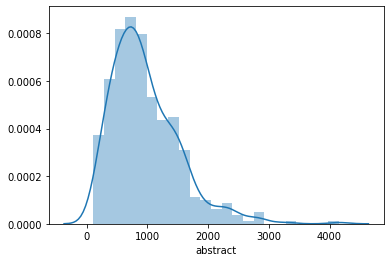

In [62]:
sns.distplot(ab.str.len())

tfdif for document matrix of terms being used.  